# Population Simulation: Type 1 Diabetes
Timothy Novak and Maia Materman

The following section of code recreates the population model from the ModSim Notebooks. This code is here primarily for reference.

Saving figure to file chap04-fig01.pdf


7.6546433958074465

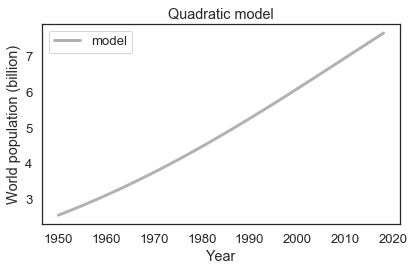

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html
def plot_results(timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """

    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

system = System(t_0=1950, 
                t_end=2018,
                p_0=2.557628654,
                alpha=0.025,
                beta=-0.0018)
results = run_simulation(system, update_func_quad)
plot_results(results, 'Quadratic model')
savefig('chap04-fig01.pdf')
results[system.t_end]

## Motivating Question
What is the percent of the population which will have type 1 diabetes in 100 years?

However, this question is a little bit difficult to find data on, so we specified the question.

## New Motivating Question

What is the percent population of Austria which will have type 1 diabetes in 100 years?

We selected Austria because Austria is one of the few countries in the world with comprehensive records on their type 1 diabetic population.


## Calibrating Population Growth Model to Desired Population
The population model can be hand calibrated to represent Austria's population. This means that we first need to create a population vs time graph.

In [7]:
#innitializes the timeseries with the population data on the Austrian population
austrian_pop = TimeSeries()
austrian_pop[1923] = 6534742
austrian_pop[1934] = 6760044
austrian_pop[1939] = 6652567
austrian_pop[1951] = 6933905
austrian_pop[1961] = 7073807
austrian_pop[1971] = 7491526
austrian_pop[1981] = 7555338
austrian_pop[1991] = 7795786
austrian_pop[1997] = 8072000
austrian_pop[2001] = 8032587
austrian_pop[2011] = 8401940
austrian_pop[2018] = 8823054

Now that we have our original data stored in a series, we can scatterplot our data.

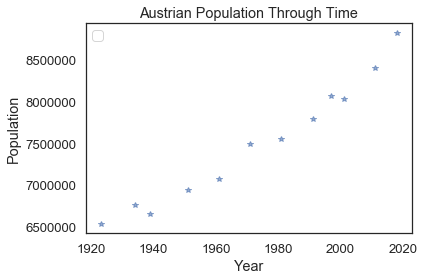

In [9]:
#plot the data
plot(austrian_pop, "*")
#decorate the plot
decorate(title = "Austrian Population Through Time",
         xlabel = "Year",
         ylabel = "Population")

Now we can add the logistic population growth model to the data (the logistic regression fit was found by hand).

In [1]:
#this is the update function and formula from the chapter 7 notebook
def update_func_quad1(pop, t, system):
    """Compute the population next year with a quadratic model with the carrying capacity parameterization.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    #applies the model to calculate the change in population
    net_growth = pop*system.max_rate*(1- pop/system.carrying_capacity)
    #returns the new population
    return pop + net_growth

#defines a new system which holds relevant parameters for this model coifficents were found by hand
austrian_population_model_sys = System(t_0=1923, 
                t_end=2018,
                p_0=austrian_pop[1923]-220000,
                max_rate = .0041,
                carrying_capacity = 40000000)
#runs a simulation to generate model data using the values imbedded in the system
results = run_simulation(austrian_population_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plot the original population data
plot(austrian_pop, "*", label = "Population Data")
#decorate the plot
decorate(title = "Austrian Population Through Time",
         xlabel = "Year",
         ylabel = "Population")
#adds a legend to the graph
legend()

NameError: name 'System' is not defined

For later use we will store the equation as a function. That way we can estimate population values based on the equation.

In [2]:
def Logistic_population_model (year, system):
    #This function takes in a year and parameter data and will return a population in that year based on the logistic growth model
    #returns the population in the desired year
    return system.carrying_capacity/(1+(system.carrying_capacity-system.p_0)/system.p_0*exp(-system.max_rate*year))

## Projecting the Data into the Future
To answer the motivating question we have to know where the population of Austria will be in 100 years. To estimate, we can project our newly calibrated curve 100 years into the future.

In [3]:
#defines a new system which holds relevant parameters for this model and an end date projected into the future
austrian_population_model_sys = System(t_0=1923, 
                t_end=2118,
                p_0=austrian_pop[1923]-220000,
                max_rate = .0041,
                carrying_capacity = 40000000)
#runs a simulation to generate model data using the values imbedded in the system
results = run_simulation(austrian_population_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plot the original population data
plot(austrian_pop, "*", label = "Population Data")
#decorate the plot
decorate(title = "Austrian Population Through Time",
         xlabel = "Year",
         ylabel = "Population")
#adds a legend to the graph
legend()

NameError: name 'System' is not defined

## Let's Do It Again for the Population of Austrians with Type 1 Diabetes
We can now take the data for the number of Austrians with type 1 diabetes and fit another population curve to this data.

Here is the population data of individuals with the disorder.

In [10]:
#initializes time series which stores population data (converted into a total number of people with the sickness) of the people with the genetic disorder
sick_pop = TimeSeries()
sick_pop[1991] = austrian_pop[1991]*9/100000
sick_pop[1997] = austrian_pop[1997]*9.9/100000
sick_pop[2003] = austrian_pop[2001]*13.3/100000

We now need to plot this data.


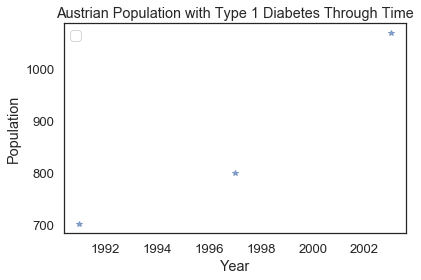

In [12]:
#plot the data
plot(sick_pop, "*")
#decorate the plot
decorate(title = "Austrian Population with Type 1 Diabetes Through Time",
         xlabel = "Year",
         ylabel = "Population")

With this information, we can fit the population curve.

In [6]:
#defines a new system which holds relevant parameters for this model coifficents were found by hand #ADJUST PARAMETERS TODO TODO TODO
austrian_population_diabetes_model_sys = System(t_0=1991, 
                t_end=2003,
                p_0=sick_pop[1991]-50,
                max_rate = .06,
                carrying_capacity = 10000)
#runs a simulation to generate model data using the values imbedded in the system
results = run_simulation(austrian_population_diabetes_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plot the original population data
plot(sick_pop, "*", label = "Population Data")
#decorate the plot
decorate(title = "Austrian population with disorder through time",
         xlabel = "Year",
         ylabel = "population")
#adds a legend to the graph
legend()

NameError: name 'sick_pop' is not defined

And adjust our system to project our results further in time.

In [ ]:
#TODO

## Calculating the Percent of the Population which has the Disorder
Our Model Metric is the percent of the population who have type 1 diabetes. This allows us to compress all of our analysis into one number. We can calculate this by dividing the population of individuals with the disorder by the total population.

In [46]:
percent_sick_population = TimeSeries()
#change this code to reference the first & last indexes of the data
for counter in linrange(1920,2118,1):
    percent_sick_population[counter] = 100* Logistic_population_model(counter,austrian_population_diabetes_model_sys)/Logistic_population_model(counter,austrian_population_model_sys)

Now we can plot the results over time.

In [13]:
#plot the data
plot(percent_sick_population, "*")
#decorate the plot
decorate(title = "% Austrian Population with Type 1 Diabetes Through Time",
         xlabel = "Year",
         ylabel = "% Population with Type 1 Diabetes")

NameError: name 'percent_sick_population' is not defined

At this point, we can answer our motivating question! What is the percent of the population which is infected with type 1 diabetes 100 years in the future?

In [50]:
print(100* Logistic_population_model(2118,austrian_population_diabetes_model_sys)/Logistic_population_model(2118,austrian_population_model_sys))
print("percent")

0.025022578643859882
percent


So we're done right? Well that was a bit boring wasn't it? So we will make another simulation which is more "real".

## A Newer and Better Model
For our next model we are going to simulate a population by treating it as though it is made of individual people. What this means is that our new model will simulate disorder propogation by breeding people/killing people during each time step and keeping track of the number of individuals with the disorder as dictated by genetic precentages for its transmission.

A newer and better question:
Are genetic factors suficent to explain the recent increase in percent population with type 1 diabeties?

### Initial Conditions and System Variable Set Up
We first need to look at inital conditions and system inputs.

In [14]:
#Innitialize System with various transmission precentages and innital populations of infected, carrying and non infected individuals
system = System(initpop = 6236068, percent_safe_pop =.9653 , percent_carry_pop =.0345, percent_sick_pop = .0002)
#create 2d array of transmission rates
#the output array is as follows
#   MM  Mm  mm
#FF.01 .01 .10
#Ff.01 .02 .10
#ff.04 .04 .14
transmission_rates = [[.01,.01,.1],[.01,.02,.1],[.04,.04,.14]]

### Setting Up the Initial Populations
We will take the each of the initial populations of the group and divide them into two groups on the basis of sex. One is made to represent males and the other is made to represent females. Interestingly enough, the progation rates of the disorder vary by sex of the parents.

Ok so now we will assume a person can have one of three states:
0: A person does not have any of the transmission genes
1: A person is a carrier of the disorder but does not have it themselves
2: A person has the disorder

We will now create an array of males and females which each contain the calculated populations of neutral, carriers, and those with type 1 diabetes. It is important to note that because the population of Austria is quite large it is infeasable to use this approach to simulate each person individually. As a result, each "person" in our arrays is representative of one million people.

In [16]:
#create arrays of people
female = []
male = []
#divide relative populations by two to find the number of males and females for each group then divide by 100,000 so that each'person in the array is representative of 100000 people
for i in range((system.initpop * system.percent_safe_pop)/2/100000):
    female.append(0)
    male.append(0)
for j in range((system.initpop* system.percent_carry_pop)/2/100000):
    female.append(1)
    male.append(1)
for k in range((system.initpop* system.percent_sickpop)/2/100000:
    female.append(2)
    male.append(2)

When we start accounting for deaths, it will be important that the arrays are randomized.

In [14]:
#scramble the arrays with .shuffle()
#TODO

### Breeding Algorithm
For each time step we will need to breed our population. For this reason, we need to create a breeding algorithm. We will assume that each male has an equal chance of being paired with any female. So we will start by picking a random male and a random female.

In [18]:
#generate a random male and a random female
#TODO

Now we will mate the individuals. We assume that one person will be formed from every couple. We then use the flip function to determine whether the child has the disorder, is a carrier, or has no relation to the disorder. We found these values from research on type 1 diabetes. We also assume that there is an equal probability of the child being either male or female.

In [19]:
#generate a child and assign a trait to it and append it to the relevant array
#TODO

That breeding function is the heart of our model. At this point, it makes sense to encapsulate it into a mate function.

In [15]:
#encapsulate the code above into a function
#TODO

### Time Step
Now we can start making our update function which gets run every time step. At the start of our time step we want to generate a number of babies which correlates to the growth rate of the population.

In [21]:
#make a loop which generates a number of kids by running it in proportion to the growthrate + death rate
#TODO

Before we go on, it is important to note that on the previous code, we generate children equal to the growth rate + the death rate because the growth rate in the graph is actually the net growth rate (living people - dead people). This is necessary to consider when we make new people.

This seems good, we are generating new babies, but this falls into the problem that our very first model of population tis semester fell into: it assumes a constant growth rate. so we need to write another function which retrieves a growthrate from our total austrian population model from earlier.

In [22]:
#Growth rate retrieval function
#TODO

Ok now there is just one more idea we need to account for in our time step: The people that die off. We need to kill off people in the population equal in number to what the death rate predicts.

In [23]:
#Handel Death rate
#TODO

You might notice that we are handeling these deaths in an odd way, by explicitly killing off the people from the begining of the array. This is because it creates population turn over. New babies are added to one end of the array and the other end of the array has the old die off. This then means that as a baby gets older it will get cycled through the array untill it dies at the other end.This keeps the population from becoming stagnant when the growth rate lessens towards the carrying capacity.

Well we can now calculate the percent of the population which is infected by dividing the number of infected individuals by the total population (found as the sum of males and females in the population). We can also encapsulate the function at the end of this into an update function.

In [24]:
#make percent population calculation and encapsulate update function
#TODO

### Run simulation
We can now make a pretty standard run simulation function which retuns a time series with 

In [25]:
#Run simulation function which retuns a time Series
#TODO

### Results
Ok so lets get some results. We can plot the percent population which is infected over time.

In [26]:
#Plot of percent infected over time
#TODO

We can also calculate the answer to our motivating question.

In [27]:
#calculate the answer to the motivating question
#TODO

### Comaprason of data and results
An interesting result of having made two different models is that we can compare them against each other.

In [28]:
#Comparason stuffs
#Todo

### Interpretation
Lets Interpret things!

In [29]:
#interpretation
#TODO